In [1]:
import warnings
warnings.filterwarnings("ignore")
#for handling RAM
import gc 

#stats
from statsmodels.stats.anova import AnovaRM
#import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
#import pingouin as pg


#my to go packages
import math
import random
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.gridspec import GridSpec
from matplotlib import cm


#for readin
import glob # Package for Unix-style pathname pattern expansion
import os   # Python operating system interface

#for signal processing
from scipy.interpolate import CubicSpline,interp1d
import scipy.signal as signal
import scipy.stats as stats
from scipy.signal import filtfilt, butter
from scipy.fft import rfft, rfftfreq
from scipy.stats import sem 
from scipy.stats import norm
from scipy.stats import ttest_rel

#other packages
import ast
import itertools
from itertools import groupby
from more_itertools import consecutive_groups
import more_itertools as mit
from operator import itemgetter
import statistics
from sklearn.mixture import GaussianMixture


from statsmodels.discrete.discrete_model import MNLogit

import heapq

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import cv2
import matplotlib.ticker as ticker


In [2]:
# readin psychopy

In [3]:
def fs(width,height):#setting plot size
    plt.rcParams['figure.figsize'] = (width,height)

In [4]:
pathpy = "Z:/yueying/gazeObject_YueyingDong/results/data/psychopy/*.csv"
pathIrb = "Z:/yueying/gazeObject_YueyingDong/irb_clean.csv"

In [5]:
glob.glob(pathpy)[-4:]

['Z:/yueying/gazeObject_YueyingDong/results/data/psychopy\\psyFull_311to327.csv',
 'Z:/yueying/gazeObject_YueyingDong/results/data/psychopy\\psyFull_360to400.csv',
 'Z:/yueying/gazeObject_YueyingDong/results/data/psychopy\\psyFull_328to352.csv']

In [6]:
psyFull = pd.DataFrame()
conAll = pd.DataFrame()
for f in glob.glob(pathpy)[:]:
    

    trlInfo = pd.read_csv(f)
    try:
        trlInfo = trlInfo[(trlInfo.is_practice!=True)& (trlInfo.TRIALID.isnull() == False)]
    except AttributeError:
        trlInfo = trlInfo[(trlInfo.TRIALID.isnull() == False)]
        
    psyFull = pd.concat([psyFull,trlInfo])
psyFull = psyFull.drop_duplicates().reset_index(drop = True)

In [7]:
psyFull.participant.unique()

array([   311.,    312.,    313.,    314.,    315.,    316.,    317.,
          318.,    319.,    320.,    321.,    322.,    323.,    324.,
          325.,    326.,    327., 112430.,    360.,    362.,    363.,
          364.,    365.,    366.,    367.,    368.,    369.,    370.,
          371.,    372.,    373.,    374.,    375.,    376.,    377.,
          378.,    379.,    380.,    381.,    382.,    383.,    384.,
          385.,    386.,    387.,    388.,    389.,    390.,    391.,
          392.,    393.,    394.,    395.,    396.,    397.,    398.,
          399.,    400.,    328.,    329.,    330.,    331.,    332.,
          333.,    334.,    335.,    336.,    337.,    338.,    339.,
          340.,    341.,    342.,    343.,    344.,    345.,    346.,
          347.,    348.,    349.,    350.,    351.,    352.])

In [17]:
import shutil
import os

In [19]:
trlInfo = psyFull[['trlType', 'corrAns','stimImage','TRIALID','rspThisTrl', 'rtThisTrl']]
trlInfo['subj'] = [ast.literal_eval(i)[0] for i in psyFull.TRIALID]
trlInfo['corrAns_text'] = np.where(psyFull.corrAns == 0,'same','diff')
trlInfo['rspErr'] = trlInfo.rspThisTrl == trlInfo.corrAns_text

In [20]:
"""get rid of no rsp trls"""
trlInfo = trlInfo[(trlInfo.rspThisTrl.isnull() == False) & (~trlInfo.subj.isin(['321']))]
trlInfo = trlInfo[trlInfo.rtThisTrl > 0].reset_index(drop=True)

In [21]:
subjMean = trlInfo.groupby(['subj','trlType']).mean(['rspErr','rtThisTrl']).reset_index()

In [22]:
subjMean[subjMean.rspErr < 0.6]

,subj,trlType,corrAns,rtThisTrl,rspErr
87,362,visual,0.460993,0.979855,0.588652
99,368,visual,0.475000,1.043488,0.550000
161,399,visual,0.475000,0.727328,0.550000


In [23]:
subjMean[subjMean.rspErr < 0.75]

,subj,trlType,corrAns,rtThisTrl,rspErr
73,347,visual,0.464968,0.975628,0.738854
87,362,visual,0.460993,0.979855,0.588652
98,368,verbal,0.569620,1.087087,0.677215
99,368,visual,0.475000,1.043488,0.550000
100,369,verbal,0.551948,0.807426,0.681818
101,369,visual,0.480769,0.774144,0.628205
161,399,visual,0.475000,0.727328,0.550000


# rsp err

In [ ]:
def cohenD(group1,group2):
    # Calculate means
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)

    # Calculate standard deviations
    std1 = np.std(group1, ddof=1)  # Sample standard deviation
    std2 = np.std(group2, ddof=1)

    # Calculate sample sizes
    n1 = len(group1)
    n2 = len(group2)

    # Calculate pooled standard deviation
    pooledstd = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

    # Calculate Cohen's d
    cohend = (mean1 - mean2) / pooledstd
    return cohend

In [34]:
print(subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'verbal')].rspErr.mean() * 100,
subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'verbal')].rspErr.std() * 100)

print(subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'verbal')].rspErr.mean() * 100,
subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'verbal')].rspErr.std() * 100)

94.91187186579825 3.113104259022401
93.22913651011827 6.596840628989184


In [35]:
print(subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'visual')].rspErr.mean()* 100,
subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'visual')].rspErr.std()* 100)

print(subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'visual')].rspErr.mean()* 100,
subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'visual')].rspErr.std()* 100)

88.34059937554306 5.964125517729162
85.5194510643289 10.766756413471812


In [36]:
print(stats.ttest_rel(subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'visual')].rspErr,
                subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'verbal')].rspErr,        
                        nan_policy='omit'),'\n',
stats.ttest_rel(subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'visual')].rspErr,
                subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'verbal')].rspErr,        
                        nan_policy='omit'))

TtestResult(statistic=-8.779255600700237, pvalue=7.17208528396658e-11, df=40) 
 TtestResult(statistic=-5.693408926340218, pvalue=1.274692706240397e-06, df=40)


In [46]:
print('response error \n----------')

print('precue, cohen d:', cohenD(subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'visual')].rspErr,
       subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'verbal')].rspErr))

print('retrocue, cohen d:', cohenD(subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'visual')].rspErr,
       subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'verbal')].rspErr))

response error 
----------
precue, cohen d: -1.381327284613463
retrocue, cohen d: -0.8634777987140155


# rt

In [33]:
print(subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'verbal')].rtThisTrl.mean(),
subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'verbal')].rtThisTrl.std())

print(subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'verbal')].rtThisTrl.mean(),
subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'verbal')].rtThisTrl.std())

0.9261502714680381 0.20150747725942242
0.9422662418088132 0.159423274021073


In [34]:
print(subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'visual')].rtThisTrl.mean(),
subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'visual')].rtThisTrl.std())

print(subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'visual')].rtThisTrl.mean(),
subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'visual')].rtThisTrl.std())

0.9821365061638373 0.20919150052266375
1.0056341706820606 0.18574876005070654


In [35]:
print(stats.ttest_rel(subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'visual')].rtThisTrl,
                subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'verbal')].rtThisTrl,        
                        nan_policy='omit'),'\n',
stats.ttest_rel(subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'visual')].rtThisTrl,
                subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'verbal')].rtThisTrl,        
                        nan_policy='omit'))

TtestResult(statistic=4.784065751027228, pvalue=2.3499799485114487e-05, df=40) 
 TtestResult(statistic=4.8863437258262135, pvalue=1.6996301945081186e-05, df=40)


In [48]:
print('rt \n----------')

print('precue, cohen d:', cohenD(subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'visual')].rtThisTrl,
       subjMean[(subjMean.task =='precue') &(subjMean.trlType == 'verbal')].rtThisTrl))

print('retrocue, cohen d:', cohenD(subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'visual')].rtThisTrl,
       subjMean[(subjMean.task =='retrocue') &(subjMean.trlType == 'verbal')].rtThisTrl))

rt 
----------
precue, cohen d: 0.27259107669977645
retrocue, cohen d: 0.3661039978135439


# precue vs retrocue

In [52]:
subjMeanAgg = trlInfo.groupby(['subj','task']).mean(['rspErr','rtThisTrl']).reset_index()
print(subjMeanAgg.rspErr.mean() * 100)

90.49219665261121


In [59]:
print('response err \n-------')

print(stats.ttest_ind(subjMeanAgg[(subjMeanAgg.task =='precue') ].rspErr,
                subjMeanAgg[(subjMeanAgg.task =='retrocue') ].rspErr,        
                        nan_policy='omit'),'\n',)

print('cohen d:',
    cohenD(subjMeanAgg[(subjMeanAgg.task =='precue') ].rspErr,
                subjMeanAgg[(subjMeanAgg.task =='retrocue') ].rspErr)
)

response err 
-------
TtestResult(statistic=1.6392755910511712, pvalue=0.10508280879081566, df=80.0) 

cohen d: 0.36205541035405375


In [62]:
print('rt \n-------')

print(stats.ttest_ind(subjMeanAgg[(subjMeanAgg.task =='precue') ].rtThisTrl,
                subjMeanAgg[(subjMeanAgg.task =='retrocue') ].rtThisTrl,        
                        nan_policy='omit'),'\n',)

print('cohen d:',
    cohenD(subjMeanAgg[(subjMeanAgg.task =='precue') ].rtThisTrl,
                subjMeanAgg[(subjMeanAgg.task =='retrocue') ].rtThisTrl)
)

rt 
-------
TtestResult(statistic=-0.48236936212097886, pvalue=0.6308608015284822, df=80.0) 

cohen d: -0.10653756958153993


In [38]:
subjMean['rspErr'] = np.round(subjMean.rspErr *100,2)

In [39]:
plt.rcParams['font.family'] = 'arial'

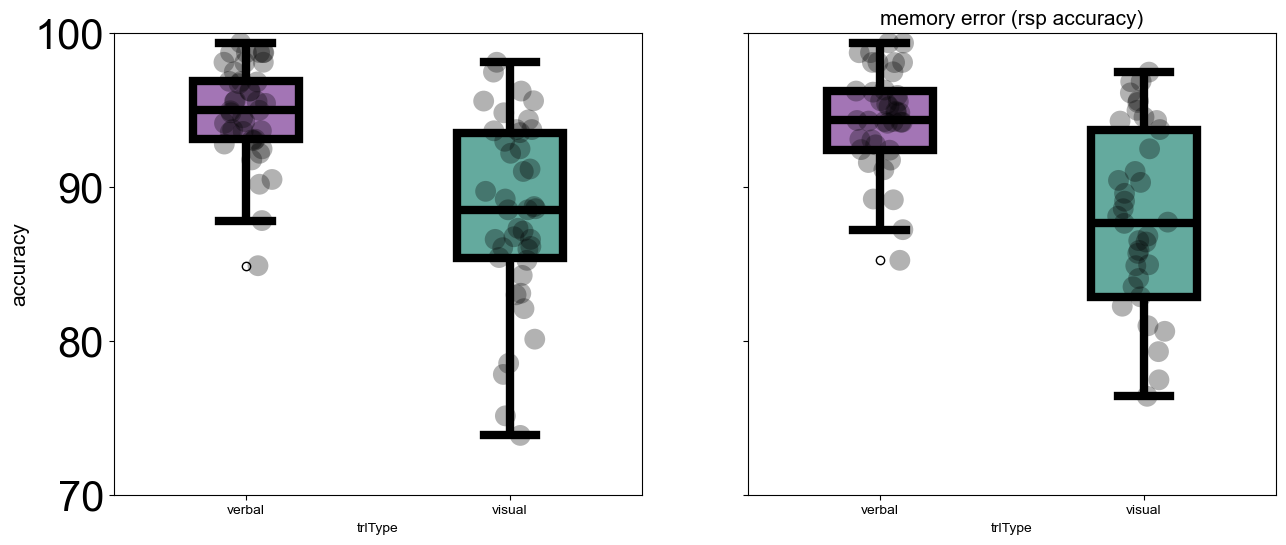

In [40]:
fs(15,6)

fig,ax = plt.subplots(ncols = 2,sharex=True,sharey=True)
sns.stripplot(x = 'trlType',y = 'rspErr',palette=['black'],zorder=10, marker = "o",s = 15,alpha = 0.3,
              data = subjMean[subjMean.task =='precue'],ax = ax[0])
"""#this add lines between dots
locs1 = ax[0].get_children()[0].get_offsets().data
locs2 = ax[0].get_children()[1].get_offsets().data

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax[0].plot(x, y, color="black", alpha=0.1)"""

sns.boxplot(x = 'trlType',y = 'rspErr',palette=['#a86ac0','#59b5a6'],width = 0.4,linecolor = 'black',
                linewidth=6,data = subjMean[subjMean.task =='precue'],ax = ax[0])


sns.stripplot(x = 'trlType',y = 'rspErr',s = 15,palette=['black'],zorder=10,alpha = 0.3,
               marker = "o",data = subjMean[subjMean.task =='retrocue'],ax = ax[1])
"""#this add lines between dots
locs1 = ax[1].get_children()[0].get_offsets().data
locs2 = ax[1].get_children()[1].get_offsets().data

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax[1].plot(x, y, color="black", alpha=0.1)
"""
sns.boxplot(x = 'trlType',y = 'rspErr',linewidth = 6,width = 0.4,linecolor = 'black',
            palette=['#a86ac0','#59b5a6'],data = subjMean[subjMean.task =='retrocue'],ax = ax[1])

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))


plt.ylim(70,100)

plt.title('memory error (rsp accuracy)',fontsize = 15)
ax[0].set_ylabel('accuracy',fontsize = 15)
#plt.xlabel('condition',fontsize = 15)
ax[0].tick_params(axis='y', which='major', labelsize=30)
#plt.tight_layout()


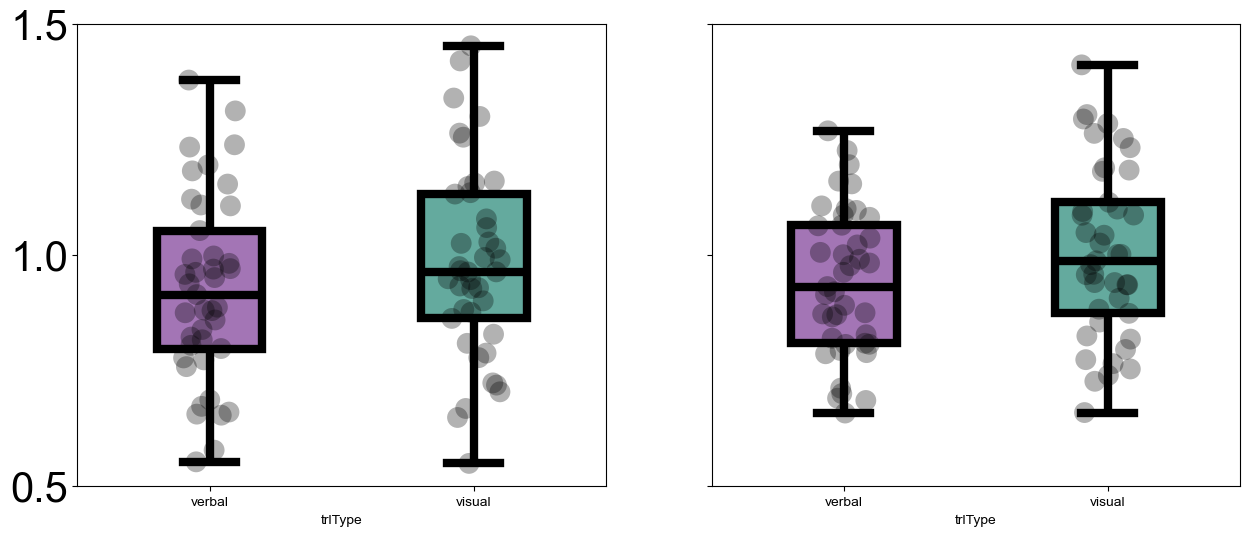

In [41]:
fs(15,6)

fig,ax = plt.subplots(ncols = 2,sharex=True,sharey=True)
sns.stripplot(x = 'trlType',y = 'rtThisTrl',s = 15,alpha = 0.3,palette=['black'],zorder=10, marker = "o",
              data = subjMean[subjMean.task =='precue'],ax = ax[0])
"""#this add lines between dots
locs1 = ax[0].get_children()[0].get_offsets().data
locs2 = ax[0].get_children()[1].get_offsets().data

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax[0].plot(x, y, color="black", alpha=0.1)"""

sns.boxplot(x = 'trlType',y = 'rtThisTrl',palette=['#a86ac0','#59b5a6'],linecolor = 'black',
                linewidth = 6,width = 0.4,data = subjMean[subjMean.task =='precue'],ax = ax[0])


sns.stripplot(x = 'trlType',y = 'rtThisTrl',s = 15,alpha = 0.3,palette=['black'],zorder=10, marker = "o",data = subjMean[subjMean.task =='retrocue'],ax = ax[1])
"""#this add lines between dots
locs1 = ax[1].get_children()[0].get_offsets().data
locs2 = ax[1].get_children()[1].get_offsets().data

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax[1].plot(x, y, color="black", alpha=0.1)"""

sns.boxplot(x = 'trlType',y = 'rtThisTrl',linewidth = 6,width = 0.4,linecolor = 'black',
            palette=['#a86ac0','#59b5a6'],data = subjMean[subjMean.task =='retrocue'],ax = ax[1])

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.ylim(0.5,1.5)
plt.title('',fontsize = 15)
ax[0].set_ylabel('',fontsize = 15)
#plt.xlabel('condition',fontsize = 15)
ax[0].tick_params(axis='y', which='major', labelsize=30)


In [44]:
retrocuePup = pd.read_csv("Z:/yueying/gazeObject_YueyingDong/results/data/pupClean/cleanPup_360to400.csv").iloc[:,1:]
retrocuePup['participant'] = [ast.literal_eval(i)[0] for i in retrocuePup.TRIALID]

In [45]:
precuePup = pd.read_csv("Z:/yueying/gazeObject_YueyingDong/results/data/pupClean/cleanPup_311to352.csv").iloc[:,1:]
precuePup['participant'] = [ast.literal_eval(i)[0] for i in precuePup.TRIALID]

In [46]:
task = 'precue'
if task == 'retrocue':
    stimStart = 500
    stimEnds = 1500

    delayStart = 3000
    delayEnds = 6000
else:
    
    stimStart = 1500
    stimEnds = 2500

    delayStart = 3000
    delayEnds = 6000

In [47]:
precuePup_Norm = precuePup.iloc[:,501:6001].sub(np.nanmean(precuePup.iloc[:,301:501],axis = 1)[:,None],axis = 1)
precuePup_Norm = pd.concat([precuePup.iloc[:,0],precuePup_Norm],axis = 1)
precuePup_Norm = precuePup_Norm.merge(trlInfo, how = 'left')

In [48]:
retrocuePup_Norm = retrocuePup.iloc[:,501:6001].sub(np.nanmean(retrocuePup.iloc[:,301:501],axis = 1)[:,None],axis = 1)
retrocuePup_Norm = pd.concat([retrocuePup.iloc[:,0],retrocuePup_Norm],axis = 1)
retrocuePup_Norm = retrocuePup_Norm.merge(trlInfo, how = 'left')

In [49]:
pupMean_precue = precuePup_Norm.groupby('rspErr').mean(numeric_only=True)
pupSem_precue = precuePup_Norm.groupby('rspErr').sem(numeric_only=True)

pupMean_retrocue = retrocuePup_Norm.groupby('rspErr').mean(numeric_only=True)
pupSem_retrocue = retrocuePup_Norm.groupby('rspErr').sem(numeric_only=True)

In [50]:
retrocueT = np.array([0.5,1.5,2,2.5,3,6])- 0.5
precueT = np.array([0.5,1.5,2.5,3,6]) - 0.5

In [52]:
pupMean_retrocue = retrocuePup_Norm.groupby(['trlType',]).mean(numeric_only=True)
pupMean_precue = precuePup_Norm.groupby(['trlType',]).mean(numeric_only=True)
pupSem_precue = precuePup_Norm.groupby('trlType').sem(numeric_only=True)
pupSem_retrocue = retrocuePup_Norm.groupby('trlType').sem(numeric_only=True)

# permutation

In [54]:
import pingouin as pg

In [55]:
def consecutive(data, stepsize=10,
                findSame = False): # helper function for findGazeShift, deBlink, and more
    """
    @ data = row vector
    @ stepsize =  the larger the step size, the more difference it allows for two groups
                to be considered within the same cluster
    @ findSame = if True, find concecutive data point of the same value, this is set true
                 for finding blink counts using the blink mask (a df of 0 and 1 )
    """
    # this will split an array of numbers into many subarrays of consecutive numbers
    # the stepsize controls for how close of the two numbers for them to be considered
    # in the same cluster; e.g. [1,2,3,4,5,10] would be clustered together if stepsize = 5


    #data is the array of timepoint where the saccade velocity array crossed the threshold
    if findSame:
        stepsize = 0
        return np.split(data, np.where(abs(np.diff(data)) > stepsize)[0]+1)
    return np.split(data, np.where(np.diff(data) > stepsize)[0]+1)


    
def runPerm(perms,data,dataN,permLevel,):
        fCluster = np.zeros(perms)   
        
        for n in range(perms):
                print(n)
                try:
                    # shuffle condition label
                    data['randLabel'] = np.random.permutation(data[permLevel].values)
                    pseudoVis = data[data.randLabel == 'visual'].iloc[:,:dataN]
                    pseudoVer = data[data.randLabel == 'verbal'].iloc[:,:dataN]
                    
                    # calcualte the permutated statistic (e.g. F values, t values) and p values
                    tp = [stats.ttest_ind(pseudoVis.iloc[:,i],pseudoVer.iloc[:,i],
                                                    nan_policy='omit',) for i in range(dataN)]
                    statArr,pArr
                    
                    # find the clusters that exceed p value threshold
                    consGroups = consecutive(np.where(pArr < 0.05)[0], stepsize=1,findSame = False)

                    # find the cluster with the largest length,then find its corresponding t values, sum it up
                            #note: if no cluster is found, this will return 0
                    fCluster[n] =  np.round(statArr[consGroups[np.argmax(np.array([len(t) for t in consGroups]))]].sum(),3)

                except ZeroDivisionError:
                    print(f"⚠️ calculation encountered for {i}. Skipping.")
        return fCluster

In [57]:
a = precuePup_Norm.iloc[:,1:5501]
a.columns = range(a.shape[1])
a = a.groupby(a.columns // 100, axis=1).mean()

dsPup_precue = pd.concat([a,precuePup_Norm['trlType']],axis = 1)

In [58]:
b = retrocuePup_Norm.iloc[:,1:5501]
b.columns = range(b.shape[1])
b = b.groupby(b.columns // 100, axis=1).mean()

dsPup_retrocue = pd.concat([b,retrocuePup_Norm['trlType']],axis = 1)

In [60]:
perms = 5000
dataN = 55
fCluster_precue = np.zeros(perms) 
fCluster_retrocue = np.zeros(perms) 

In [61]:
"""
for n in range(perms):
    print(n)
    
    # shuffle condition label
    dsPup_precue['randLabel'] = np.random.permutation(dsPup_precue['trlType'].values)
    pseudoVis = dsPup_precue[dsPup_precue.randLabel == 'visual'].iloc[:,:dataN]
    pseudoVer = dsPup_precue[dsPup_precue.randLabel == 'verbal'].iloc[:,:dataN]
    
    # calcualte the permutated statistic (e.g. F values, t values) and p values
    tp = np.array([stats.ttest_ind(pseudoVis.iloc[:,i],pseudoVer.iloc[:,i],
                                    nan_policy='omit',) [:2] for i in range(dataN)])
    
    statArr = tp[:,0]
    pArr = tp[:,1]
    
    # find the clusters that exceed p value threshold
    consGroups = consecutive(np.where(pArr < 0.05)[0], stepsize=1,findSame = False)

    # find the cluster with the largest length,then find its corresponding t values, sum it up
            #note: if no cluster is found, this will return 0
    fCluster_precue[n] =  np.round(statArr[consGroups[np.argmax(np.array([len(t) for t in consGroups]))]].sum(),3)


for n in range(perms):
    print(n)
    
    # shuffle condition label
    dsPup_retrocue['randLabel'] = np.random.permutation(dsPup_retrocue['trlType'].values)
    pseudoVis = dsPup_retrocue[dsPup_retrocue.randLabel == 'visual'].iloc[:,:dataN]
    pseudoVer = dsPup_retrocue[dsPup_retrocue.randLabel == 'verbal'].iloc[:,:dataN]
    
    # calcualte the permutated statistic (e.g. F values, t values) and p values
    tp = np.array([stats.ttest_ind(pseudoVis.iloc[:,i],pseudoVer.iloc[:,i],
                                    nan_policy='omit',) [:2] for i in range(dataN)])
    
    statArr = tp[:,0]
    pArr = tp[:,1]
    
    # find the clusters that exceed p value threshold
    consGroups = consecutive(np.where(pArr < 0.05)[0], stepsize=1,findSame = False)

    # find the cluster with the largest length,then find its corresponding t values, sum it up
            #note: if no cluster is found, this will return 0
    fCluster_retrocue[n] =  np.round(statArr[consGroups[np.argmax(np.array([len(t) for t in consGroups]))]].sum(),3)

"""

"\nfor n in range(perms):\n    print(n)\n    \n    # shuffle condition label\n    dsPup_precue['randLabel'] = np.random.permutation(dsPup_precue['trlType'].values)\n    pseudoVis = dsPup_precue[dsPup_precue.randLabel == 'visual'].iloc[:,:dataN]\n    pseudoVer = dsPup_precue[dsPup_precue.randLabel == 'verbal'].iloc[:,:dataN]\n    \n    # calcualte the permutated statistic (e.g. F values, t values) and p values\n    tp = np.array([stats.ttest_ind(pseudoVis.iloc[:,i],pseudoVer.iloc[:,i],\n                                    nan_policy='omit',) [:2] for i in range(dataN)])\n    \n    statArr = tp[:,0]\n    pArr = tp[:,1]\n    \n    # find the clusters that exceed p value threshold\n    consGroups = consecutive(np.where(pArr < 0.05)[0], stepsize=1,findSame = False)\n\n    # find the cluster with the largest length,then find its corresponding t values, sum it up\n            #note: if no cluster is found, this will return 0\n    fCluster_precue[n] =  np.round(statArr[consGroups[np.argmax(np.

In [62]:
#np.save('Z:/yueying/gazeObject_YueyingDong/results/pupilPerm/tCluster_precue5000.npy',fCluster_precue,)
#np.save('Z:/yueying/gazeObject_YueyingDong/results/pupilPerm/tCluster_retrocue5000.npy',fCluster_retrocue,)

In [55]:
fCluster_precue = np.load('Z:/yueying/gazeObject_YueyingDong/results/pupilPerm/tCluster_precue5000.npy')
fCluster_retrocue = np.load('Z:/yueying/gazeObject_YueyingDong/results/pupilPerm/tCluster_precue5000.npy')


(array([1.000e+00, 0.000e+00, 9.000e+00, 4.000e+01, 4.600e+02, 4.382e+03,
        8.900e+01, 1.300e+01, 4.000e+00, 2.000e+00]),
 array([-190.46  , -153.6783, -116.8966,  -80.1149,  -43.3332,   -6.5515,
          30.2302,   67.0119,  103.7936,  140.5753,  177.357 ]),
 <BarContainer object of 10 artists>)

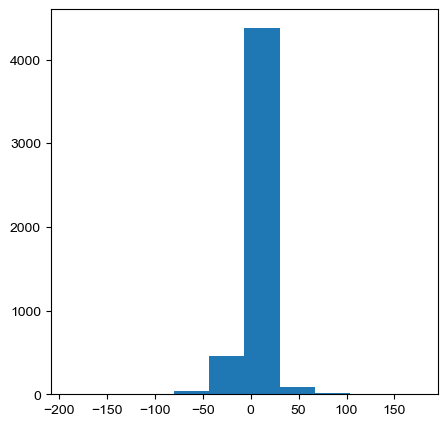

In [56]:
fs(5,5)
plt.hist(fCluster_retrocue)

In [57]:
dataN = 55
fs(5,5)

In [64]:
pupMean_retrocue

,500,501,502,503,504,505,506,507,508,509,...,5993,5994,5995,5996,5997,5998,5999,corrAns,rtThisTrl,rtLogTrans
trlType,,,,,,,,,,,,,,,,,,,,,
verbal,1.248168,1.283296,1.328202,1.372629,1.409675,1.451125,1.490598,1.517484,1.546455,1.578239,...,19.755293,19.772212,19.855954,19.883910,19.919716,19.961532,20.015835,0.562572,0.941201,-0.143532
visual,2.406561,2.460381,2.524927,2.600449,2.671307,2.729164,2.784669,2.840513,2.895802,2.955749,...,33.434323,33.484154,33.604156,33.658545,33.718606,33.711289,33.764921,0.475042,1.000343,-0.089250


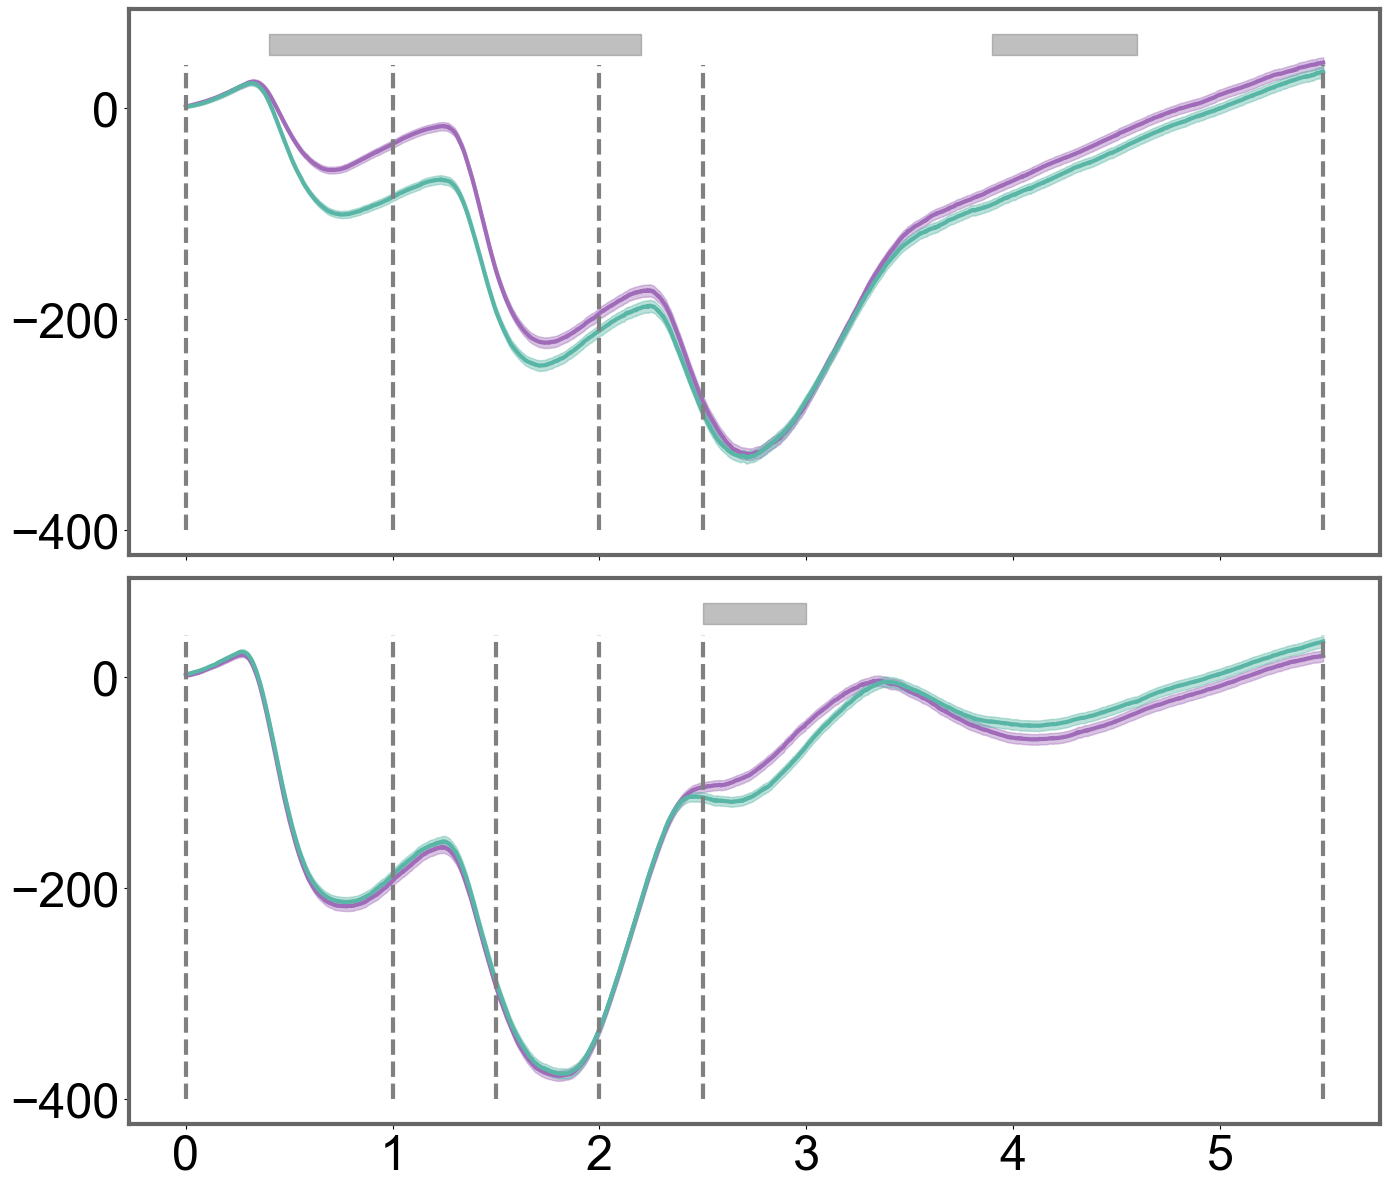

In [69]:
fs(8,8)
dataN = 5500
x = np.linspace(0,5.5,dataN)
fig,ax = plt.subplots(nrows = 2,figsize = (14,12),sharex=True)


[ax[0].plot(x,pupMean_precue.iloc[i,:dataN],color = ["#a06bb9","#59b6a6",][i],linewidth = 3) for i in range (2)]

[ax[0].fill_between(x,pupMean_precue.iloc[i,:dataN].values + pupSem_precue.iloc[i,:dataN].values,
                    pupMean_precue.iloc[i,:dataN].values - pupSem_precue.iloc[i,:dataN].values,
                    alpha = 0.4,color = ['#a06bb9','#59b6a6',][i]) for i in range(2)]

ax[0].vlines(precueT,-400,40,colors = 'grey',linestyles = 'dashed',linewidth = 3)

[ax[1].plot(x,pupMean_retrocue.iloc[i,:dataN],color = ['#a06bb9','#59b6a6',][i],linewidth = 3) for i in range (2)]
[ax[1].fill_between(x,pupMean_retrocue.iloc[i,:dataN].values + pupSem_retrocue.iloc[i,:dataN].values,
                    pupMean_retrocue.iloc[i,:dataN].values - pupSem_retrocue.iloc[i,:dataN].values,
                    alpha = 0.4,color = ['#a06bb9','#59b6a6',][i]) for i in range(2)]
ax[1].vlines(retrocueT,-400,40,colors = 'grey',linestyles = 'dashed',linewidth = 3)

ax[0].fill_between([0.4,2.2],50,70,color = 'grey',alpha = 0.5)
ax[0].fill_between([3.9,4.6],50,70,color = 'grey',alpha = 0.5)
ax[1].fill_between([2.5,3.0],50,70,color = 'grey',alpha = 0.5)

ax[0].yaxis.set_major_locator(ticker.MultipleLocator(200))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(200))

ax[1].tick_params(labelsize=35)
ax[0].tick_params(labelsize=35)


ax[0].spines['left'].set_color('#666666')
ax[0].spines['bottom'].set_color('#666666')
ax[0].spines['right'].set_color('#666666')
ax[0].spines['top'].set_color('#666666')
ax[0].spines['left'].set_linewidth(3)
ax[0].spines['bottom'].set_linewidth(3)
ax[0].spines['right'].set_linewidth(3)
ax[0].spines['top'].set_linewidth(3)

ax[1].spines['left'].set_color('#666666')
ax[1].spines['bottom'].set_color('#666666')
ax[1].spines['right'].set_color('#666666')
ax[1].spines['top'].set_color('#666666')
ax[1].spines['left'].set_linewidth(3)
ax[1].spines['bottom'].set_linewidth(3)
ax[1].spines['right'].set_linewidth(3)
ax[1].spines['top'].set_linewidth(3)

fig.tight_layout()